### Points Visualization

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [10]:
class StatsComp:
    def __init__(self, training_data, labels):
        self.training_data = training_data
        self.labels = labels

    def extract(self):
        attributes = self.training_data.groupby('block_id').apply(lambda x: self.aggregate(x)).values
        target_labels = self.labels['pts'].values
        return attributes, target_labels

    def aggregate(self, player_data):
        latest_age = player_data.age.values[-1]
        average_games_played = np.mean(player_data.gp.values)
        average_points = np.mean(player_data.pts.values)
        points_last_year = player_data.pts.values[-1]
        points_year_before_last = player_data.pts.values[-2]
        average_net_rating = np.mean(player_data.net_rating.values)
        average_true_shooting = np.mean(player_data.ts_pct.values)
        average_usage_rate = np.mean(player_data.usg_pct.values)

        aggregated_data = np.array([
            [latest_age, average_games_played, average_points, points_last_year,
             points_year_before_last, average_net_rating, average_true_shooting,
             average_usage_rate]
        ])
        return pd.DataFrame(aggregated_data)


In [11]:
class Utility:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def split_attributes_labels(self):
        attributes = self.dataframe.groupby('block_id').apply(lambda x: x.iloc[:-1]).reset_index(drop=True)
        labels = self.dataframe.groupby('block_id').apply(lambda x: x.iloc[-1]).reset_index(drop=True)
        return attributes, labels

    @staticmethod
    def split_train_test(attributes, labels, test_size=0.2, random_state=42):
        X_train, X_test, y_train, y_test = train_test_split(attributes, labels, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test


/Users/bryantchung/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/bryantchung/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/bryantchung/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


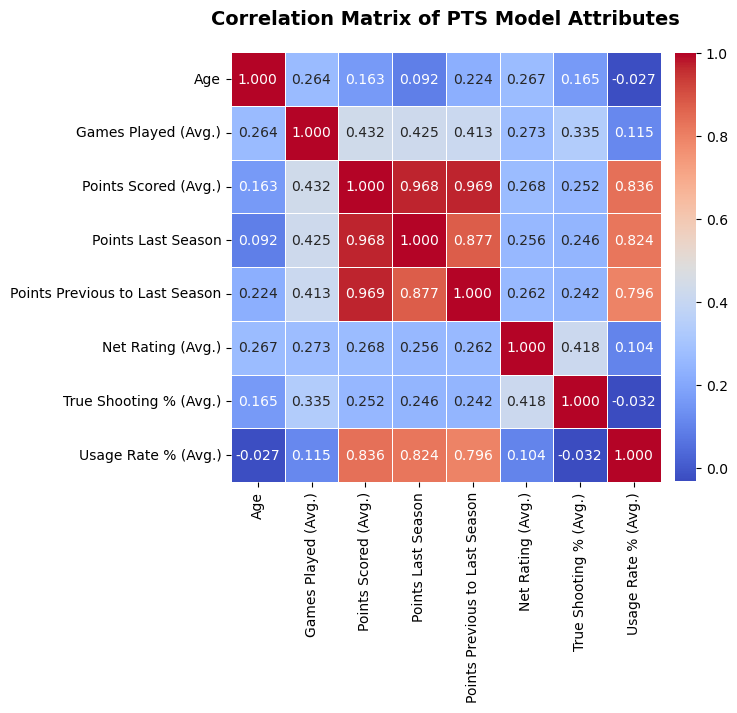

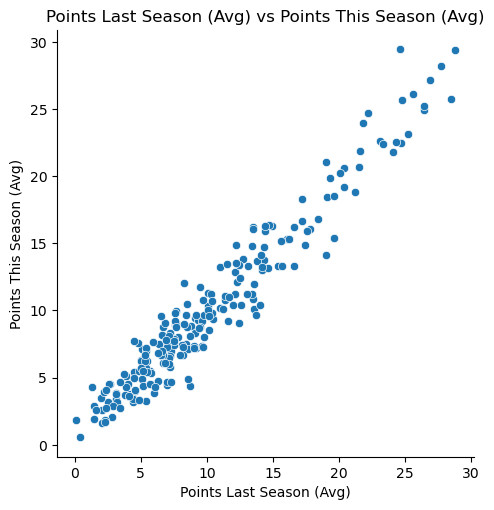

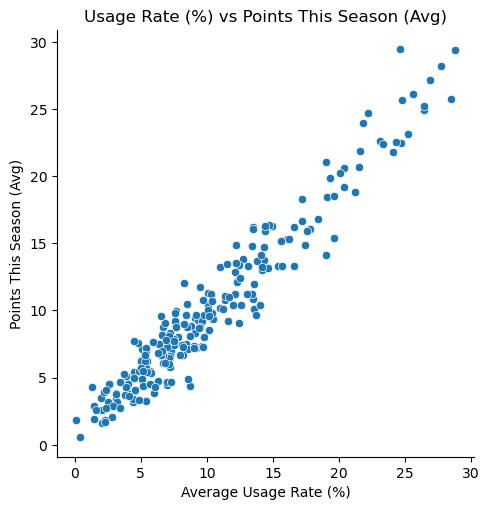

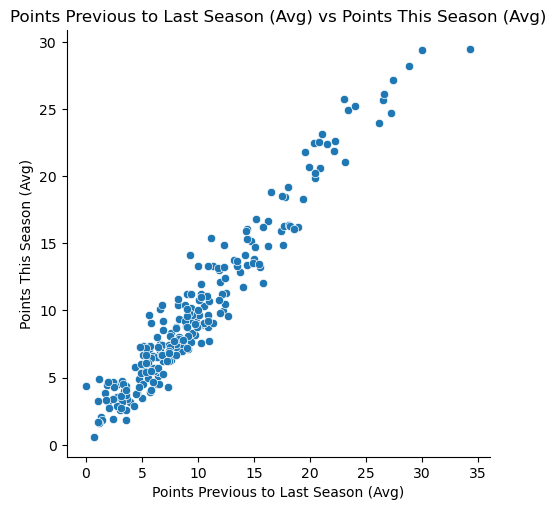

In [16]:
# load data
df_data = pd.read_csv('data/trainset.csv')

# data preprocessor with loaded dataframe
data_preprocessor = Utility(df_data)

# split 
df_xtrain, df_label = data_preprocessor.split_attributes_labels()

stats = StatsComp(training_data=df_xtrain, labels=df_label)

attribute_pts, label_pts = stats.extract()

# Correlation visualization of pts model input attributes
datacor = np.corrcoef(attribute_pts.T)  # transpose ensures attributes are columns, datacor uses correlation coefficients between variables

attributes_names = [
    'Age', 
    'Games Played (Avg.)', 
    'Points Scored (Avg.)', 
    'Points Last Season', 
    'Points Previous to Last Season', 
    'Net Rating (Avg.)', 
    'True Shooting % (Avg.)', 
    'Usage Rate % (Avg.)'
]

datacor = pd.DataFrame(data=datacor, columns=attributes_names, index=attributes_names)
plt.figure(figsize=(6,6))
ax = sns.heatmap(data=datacor, annot=True, fmt='.3f', cmap='coolwarm', square=True, linewidths=.5, cbar_kws={'fraction': 0.046, 'pad': 0.03})
plt.title('Correlation Matrix of PTS Model Attributes', fontsize=14, fontweight='bold', pad=20)
plt.savefig("pts_model_correlation_matrix.png", dpi=300, bbox_inches='tight')

#scatter plots using the actual values

attributes_df = pd.DataFrame(attribute_pts, columns=attributes_names)

# Scatter plot for Points Last Season vs Points This Season using relplot
sns.relplot(data=attributes_df, x='Points Last Season', y='Points Scored (Avg.)', kind="scatter")
plt.title('Points Last Season (Avg) vs Points This Season (Avg)')
plt.xlabel('Points Last Season (Avg)')
plt.ylabel('Points This Season (Avg)')

# Scatter plot for Usage Rate vs Points This Season using relplot
sns.relplot(data=attributes_df, x='Points Last Season', y='Points Scored (Avg.)', kind="scatter")
plt.title('Usage Rate (%) vs Points This Season (Avg)')
plt.xlabel('Average Usage Rate (%)')
plt.ylabel('Points This Season (Avg)')

# Scatter plot for Usage Rate vs Points This Season using relplot
sns.relplot(data=attributes_df, x='Points Previous to Last Season', y='Points Scored (Avg.)', kind="scatter")
plt.title('Points Previous to Last Season (Avg) vs Points This Season (Avg)')
plt.xlabel('Points Previous to Last Season (Avg)')
plt.ylabel('Points This Season (Avg)')

plt.show()


